# Итоговое задание по разделу PYTHON-13 (Визуализация данных).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

## Представлены данные об оттоке клиентов некоторого банка.

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Столбцы таблицы:

* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## Задание 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

0    7963
1    2037
Name: Exited, dtype: int64

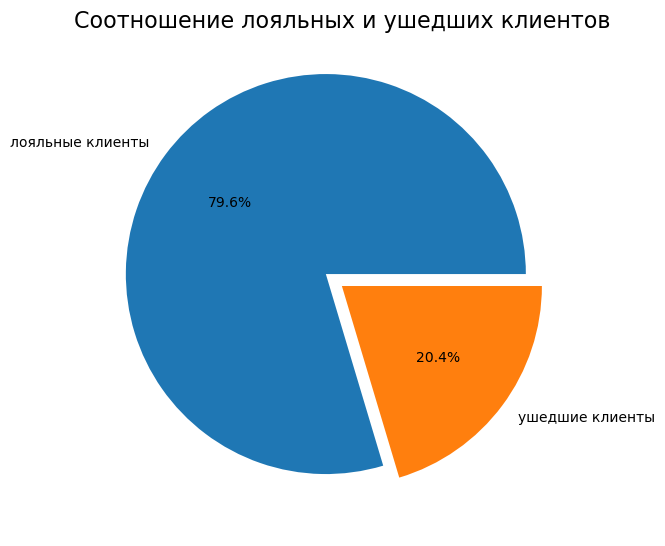

In [43]:
exited_data = churn_data['Exited'].value_counts()
display(exited_data)

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    x= [7963, 2037],
    labels=['лояльные клиенты', 'ушедшие клиенты'],
    autopct='%1.1f%%',
    explode=[0.1,0],
);
title = axes.set_title('Соотношение лояльных и ушедших клиентов', fontsize=16)


Вывод: Из круговой диаграммы, представленной выше видно, что 20.4% клиентов банк теряет. То есть как минимум, каждый четвертый клиент банка перестает пользоваться его услугами.

## Задание 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [48]:
histogram_data = churn_data[churn_data['Balance']>2500]
fig = px.histogram(
    data_frame = histogram_data,
    x = 'Balance',
    height=300,
    width=700,
    title='Распределение баланса на счетах в банке (>2500$)',
)
fig.show()

Вывод: большинство клиентов банка имею счет от 100 до 150 тыс, счет свыше 200 тыс имею еденичные клиенты до 5 человек.

## Задание 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [54]:
fig = px.histogram(
    data_frame=churn_data, 
    x='Balance', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    title='Распределение баланса клиентов: 1 - ушедших, 0 - лояльных', 
    nbins = 25
)
fig.show()


Вывод: у банка большое количество клиентов с минимальным балансом, одновременно с этим в этой категории клиентов с минимальным балансом наблюдается оттток клиентов. Таким образом возмоно клиентов не устраивает процент за использование кредитных средств. Распределение ушедших и лояльных клиентов далее по размеру балансового счета идет пропорцинально.

## Задание 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

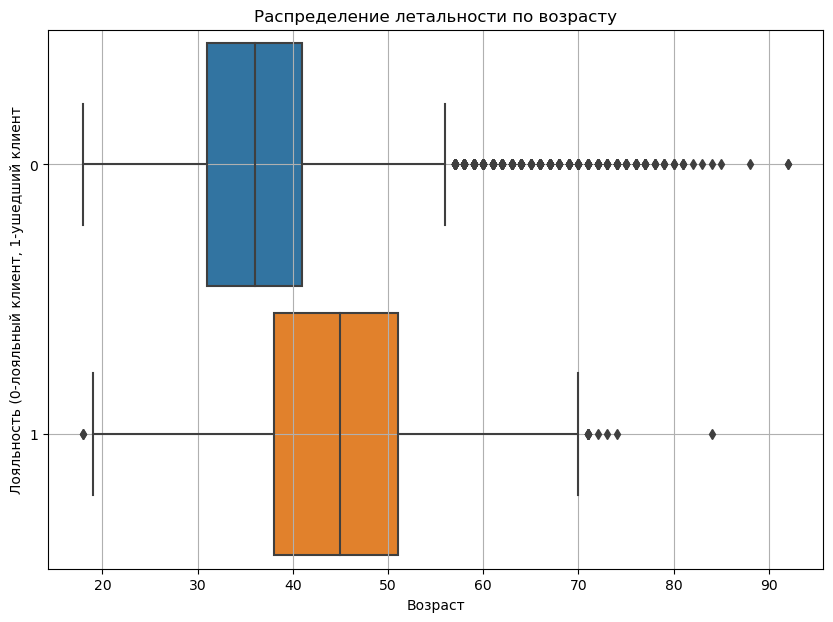

In [61]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по возрасту');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность (0-лояльный клиент, 1-ушедший клиент');
boxplot.grid()

Вывод: Потенциальных выбросов больше в группе лояльных клиентов с возрастом примерно от 56 лет. Ушедшие клиенты банка возрастом от 38 до 52 лет, на эту категорию и стоит обратить внимание.